In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Text(0.5, 0, 'Total')

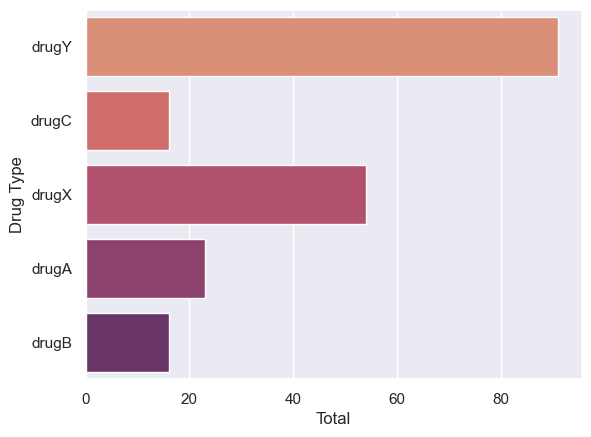

In [4]:
sns.set_theme(style='darkgrid')
sns.countplot(y='Drug', data=data, hue='Drug', palette='flare', legend=False)
plt.ylabel('Drug Type')
plt.xlabel('Total')

Text(0.5, 0, 'Gender distribution')

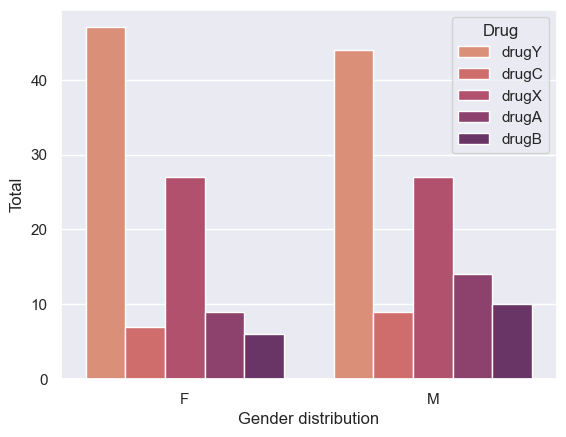

In [5]:
sns.set_theme(style='darkgrid')
sns.countplot(x='Sex', hue='Drug', data=data, palette='flare')
plt.ylabel('Total')
plt.xlabel('Gender distribution')

Text(0.5, 0, 'Total')

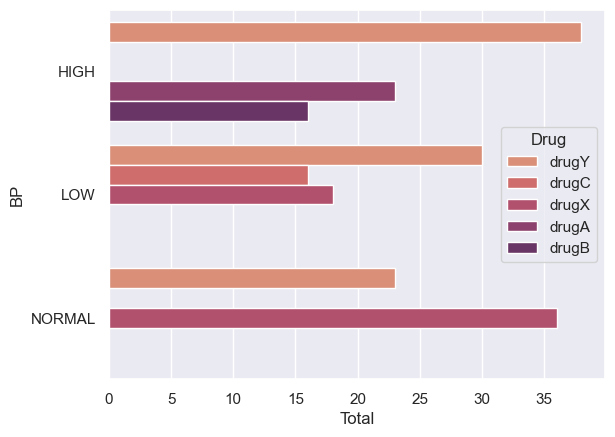

In [6]:
sns.set_theme(style='darkgrid')
sns.countplot(y='BP', hue='Drug', data=data, palette='flare')
plt.ylabel('BP')
plt.xlabel('Total')

Text(0, 0.5, 'Frequency')

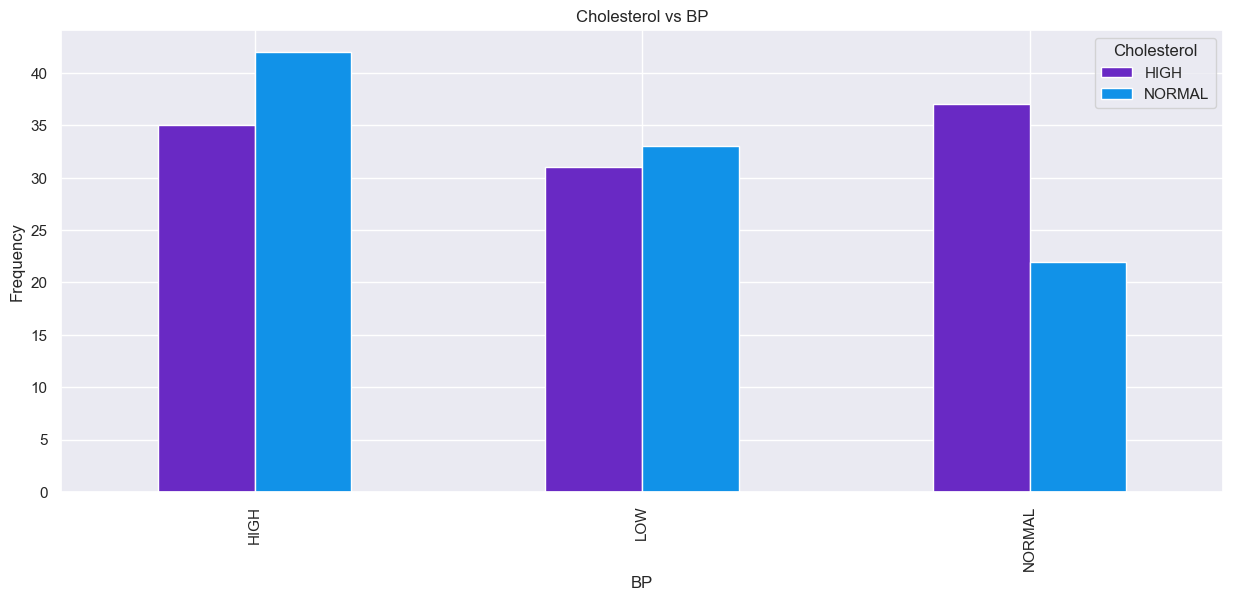

In [7]:
pd.crosstab(data['BP'], data['Cholesterol']).plot(kind='bar', figsize=(15,6), color=['#6929c4','#1192e8'])
plt.title('Cholesterol vs BP')
plt.xlabel('BP')
plt.ylabel('Frequency')

In [8]:
bin_age=[0,19,29,39,49,59,69,80]
category_age=['<20s','20s','30s','40s','50s','60s','<60s']
data['age_binned']=pd.cut(data['Age'], bins=bin_age, labels=category_age)
data=data.drop(['Age'], axis=1)

In [9]:
data

,Sex,BP,Cholesterol,Na_to_K,Drug,age_binned
0,F,HIGH,HIGH,25.355,drugY,20s
1,M,LOW,HIGH,13.093,drugC,40s
2,M,LOW,HIGH,10.114,drugC,40s
3,F,NORMAL,HIGH,7.798,drugX,20s
4,F,LOW,HIGH,18.043,drugY,60s
...,...,...,...,...,...,...
195,F,LOW,HIGH,11.567,drugC,50s
196,M,LOW,HIGH,12.006,drugC,<20s
197,M,NORMAL,HIGH,9.894,drugX,50s
198,M,NORMAL,NORMAL,14.020,drugX,20s


In [10]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
data['Na_to_K_binned'] = pd.cut(data['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
data = data.drop(['Na_to_K'], axis = 1)

In [11]:
X=data.drop(['Drug'], axis=1)
y=data['Drug']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

In [14]:
X_train,X_test=X_train.align(X_test, join='inner', axis=1, fill_value=0)
X_train=X_train.astype(int)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             200 non-null    object  
 1   BP              200 non-null    object  
 2   Cholesterol     200 non-null    object  
 3   Drug            200 non-null    object  
 4   age_binned      200 non-null    category
 5   Na_to_K_binned  200 non-null    category
dtypes: category(2), object(4)
memory usage: 7.3+ KB


In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

C:\Users\HP\OneDrive\New folder\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [17]:
X_train

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,age_binned_<20s,age_binned_20s,age_binned_30s,age_binned_40s,age_binned_50s,age_binned_60s,age_binned_<60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
3,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
376,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
377,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
378,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0


In [18]:
from sklearn.svm import SVC
# linear, poly, rbf, sigmoid
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [19]:
y_pred=model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      0.83      0.91         6
       drugB       0.60      1.00      0.75         3
       drugC       0.83      1.00      0.91         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      0.87      0.93        15

    accuracy                           0.93        40
   macro avg       0.89      0.94      0.90        40
weighted avg       0.95      0.93      0.93        40

